# QUESTION 1

In [39]:
import numpy as np
from scipy import stats

# Given data (energy intake values in kJ)
data = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

# Hypothesized population mean
mu = 7725

#  Calculate the sample mean
sample_mean = np.mean(data)

# Identifying the population mean (already given as mu = 7725)

#  Calculate the sample standard deviation and standard error of the mean (SEM)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
n = len(data)
SEM = sample_std / np.sqrt(n)

# alculate the t-statistic
t_statistic = (sample_mean - mu) / SEM

# Degrees of freedom
df = n - 1

# S Calculate the p-value (two-tailed test)
p_value = 2 * stats.t.sf(np.abs(t_statistic), df)

# Output the values
print(f"Sample Mean: {sample_mean:.2f} kJ")
print(f"Sample Standard Deviation: {sample_std:.2f} kJ")
print(f"Standard Error of the Mean (SEM): {SEM:.2f} kJ")
print(f"t-statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"p-value: {p_value:.4f}")

# Step 8: Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.")
else:
    print("Fail to reject the null hypothesis: The mean energy intake does not significantly deviate from 7725 kJ.")


Sample Mean: 6753.64 kJ
Sample Standard Deviation: 1142.12 kJ
Standard Error of the Mean (SEM): 344.36 kJ
t-statistic: -2.82
Degrees of Freedom: 10
p-value: 0.0181
Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.


# QUESTION  2 

In [40]:
import numpy as np
from scipy import stats

# Sample data
n1 = 42  # Sample size for Ireland
M1 = 74  # Mean for Ireland
SD1 = 7.4  # Standard deviation for Ireland

n2 = 61  # Sample size for Elsewhere
M2 = 57  # Mean for Elsewhere
SD2 = 7.1  # Standard deviation for Elsewhere

# Step 1: Calculate Standard Error (SE)
SE = np.sqrt((SD1**2 / n1) + (SD2**2 / n2))

# Step 2: Calculate t-statistic
t_statistic = (M1 - M2) / SE

# Step 3: Calculate degrees of freedom
df = n1 + n2 - 2

# Step 4: Calculate p-value (one-tailed)
p_value = stats.t.sf(t_statistic, df)  # one-tailed

# Output results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-Value: {p_value:.5f}")


T-Statistic: 11.6477
Degrees of Freedom: 101
P-Value: 0.00000


# QUESTION 3

1. Install xlrd

Correlation coefficient: -0.5171011715833227


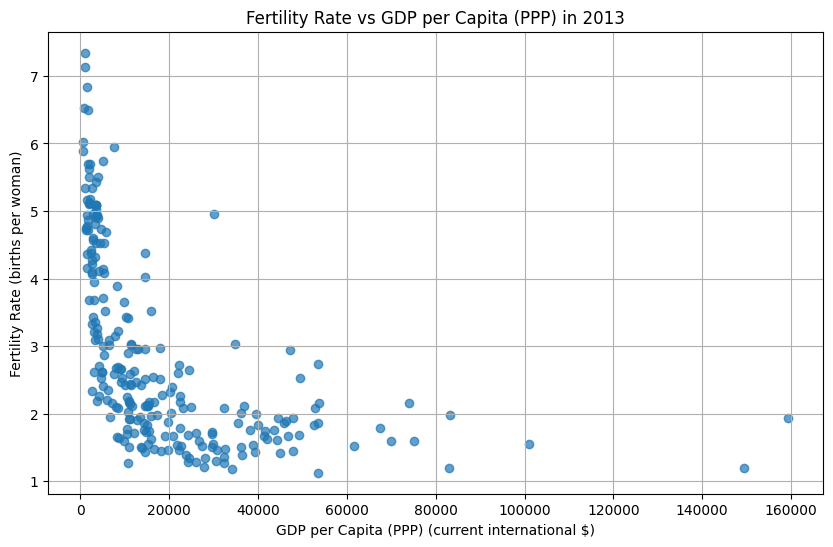

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading datasets
fertility_rate_data = pd.read_excel("API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls", sheet_name="Data", skiprows=3)
gdp_per_capita_data = pd.read_excel("API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_31824.xls", sheet_name="Data", skiprows=3)

# Filter the data for the year 2013
fertility_2013 = fertility_rate_data[['Country Name', '2013']]
fertility_2013.columns = ['Country Name', 'Fertility Rate']

gdp_2013 = gdp_per_capita_data[['Country Name', '2013']]
gdp_2013.columns = ['Country Name', 'GDP per Capita PPP']

# Merge the datasets on 'Country Name'
merged_data = pd.merge(fertility_2013, gdp_2013, on='Country Name')

# Drop rows with missing values
# merged_data.dropna(inplace=True)

# Calculate the correlation coefficient
correlation = merged_data['Fertility Rate'].corr(merged_data['GDP per Capita PPP'])
print(f'Correlation coefficient: {correlation}')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_2013['GDP per Capita PPP'], fertility_2013['Fertility Rate'], alpha=0.7)
plt.title('Fertility Rate vs GDP per Capita (PPP) in 2013')
plt.xlabel('GDP per Capita (PPP) (current international $)')
plt.ylabel('Fertility Rate (births per woman)')
plt.grid(True)



plt.show()


# QUESTION 4

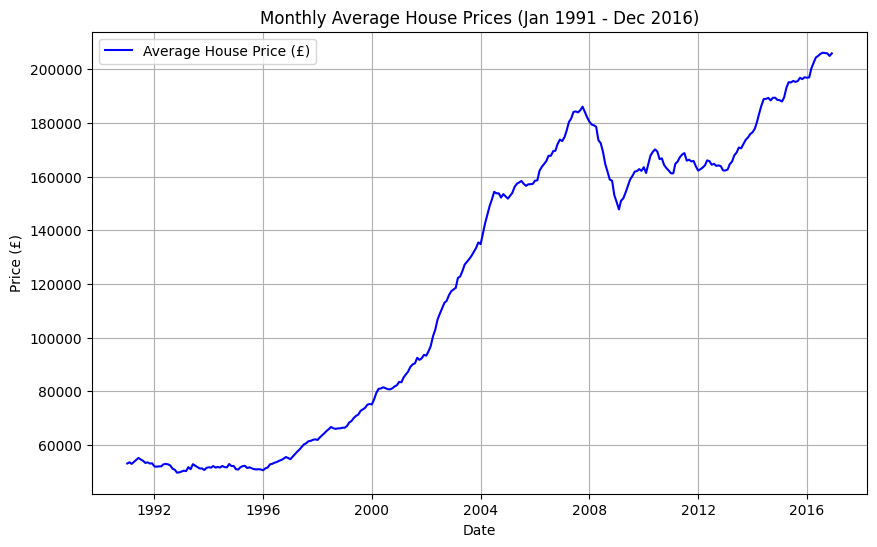

<Figure size 1000x600 with 0 Axes>

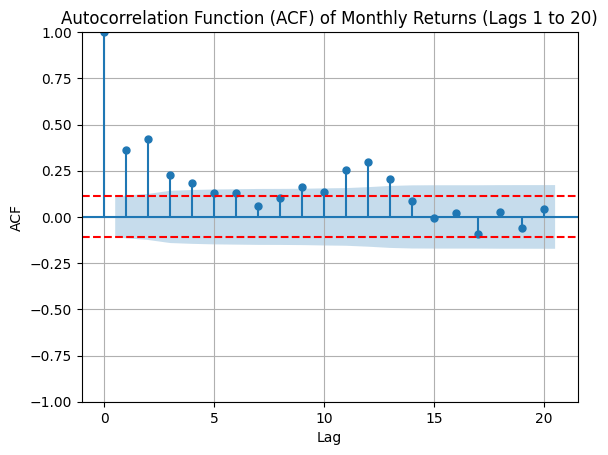

Annualized Return: 5.35%


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17104\1458039434.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (house_prices[-1] / house_prices[0]) - 1


In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

# Load the data
df = pd.read_excel("Monthly Average House Price.xls", sheet_name="Monthly")

# Convert 'Unnamed: 0' to datetime and set it as index
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)

# Restrict data to the period from Jan 1991 to Dec 2016
df = df.loc['1991-01-01':'2016-12-31']

# Extract 'Average House Price' for analysis
house_prices = df['Average House Price']

# Plot the time series of house prices (Jan 1991 - Dec 2016)
plt.figure(figsize=(10, 6))
plt.plot(house_prices, label='Average House Price (£)', color='blue')
plt.title('Monthly Average House Prices (Jan 1991 - Dec 2016)')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the monthly returns r(t) = [p(t) / p(t-1)] - 1
monthly_returns = house_prices.pct_change().dropna()

# Plot the ACF of the monthly returns for lags 1 to 20
plt.figure(figsize=(10, 6))
plot_acf(monthly_returns, lags=20)
plt.title('Autocorrelation Function (ACF) of Monthly Returns (Lags 1 to 20)')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Calculate the critical value for p < 0.05 (two-tailed)
n = len(monthly_returns)
conf_interval = 1.96 / np.sqrt(n)  # Approx. confidence interval for 95% significance

# Add horizontal lines for statistical significance at p < 0.05
plt.axhline(y=conf_interval, linestyle='--', color='red', label='95% Confidence Interval')
plt.axhline(y=-conf_interval, linestyle='--', color='red')
plt.grid(True)
plt.show()

# Calculate the annualized return over the period
total_return = (house_prices[-1] / house_prices[0]) - 1
annualized_return = (1 + total_return) ** (1 / (len(house_prices) / 12)) - 1
annualized_return_percentage = annualized_return * 100

print(f"Annualized Return: {annualized_return_percentage:.2f}%")
